# BE/Bi 103, Fall 2016: Homework 5
## Due 1pm, Sunday, November 6

(c) 2016 Justin Bois and Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained therein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This homework was generated from an Jupyter notebook.  You can download the notebook [here](hw5_protected.ipynb).*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

%matplotlib inline

### Problem 5.1: Outliers in FRET binding curve (20 pts)

We often want to ascertain how tightly two proteins are bound by measuring their dissociation constant, $K_d$.  This is usually done by doing a titration experiment and then performing a regression.  For example, imagine two proteins, $a$ and $b$ may bind to each other in the reaction

\begin{align}
ab \rightleftharpoons a + b
\end{align}

with dissociation constant $K_d$.  At equilibrium

\begin{align}
K_d = \frac{c_a\,c_b}{c_{ab}},
\end{align}

were $c_i$ is the concentration of species $i$.  If we add known amounts of $a$ and $b$ to a solution such that the total concentration of a is $c_a^0$ and the total concentration of b is $c_b^0$, we can compute the equilibrium concentrations of all species.  Specifically, in addition to the equation above, we have conservation of mass equations,

\begin{align}
c_a^0 &= c_a + c_{ab}\\[1em]
c_b^0 &= c_b + c_{ab},
\end{align}

fully specifying the problem.  We can solve the three equations for $c_{ab}$ in terms of the known quantities $c_a^0$ and $c_b^0$, along with the parameter we are trying to measure, $K_d$.  We get

\begin{align}
c_{ab} = \frac{2c_a^0\,c_b^0}{K_d+c_a^0+c_b^0 + \sqrt{\left(K_d+c_a^0+c_b^0\right)^2 - 4c_a^0\,c_b^0}}.
\end{align}

The technique, then, is to hold $c_a^0$ fixed and measure $c_{ab}$ for various $c_b^0$.  We can then perform a regression to get $K_d$.

In order to do this, though, we need some readout of $c_{ab}$.  For this problem, we will use FRET (fluorescence resonance energy transfer) to monitor how much of $a$ is bound to $b$.  Specifically, we consider $a$ to have a fluorophore and $b$ to be its receptor.  When the two are unbound, we get a fluorescence signal per molecule of $f_0$.  When they are bound, the receptor absorbs the light coming out of the fluorophore, so we get less fluorescence per molecule, which we will call $f_q$ (for "quenched").  Let $f$ be the total per-fluorophore fluorescence signal.  Then, the measured fluorescence signal, $F$, is

\begin{align}
F = c_a^0\,V f = \left(c_a \,f_0 + c_{ab}\, f_q\right)V,
\end{align}

where $V$ is the reaction volume.  We define by $e$ the FRET efficiency,

\begin{align}
e = 1 - \frac{f}{f_0}.
\end{align}

If we measure $F_0$, the measured fluorescence when there is no b protein in the sample, we can compute the FRET efficiency from  the measured values $F$ and $F_0$

\begin{align}
e =  1 - \frac{c_a^0\,V f}{c_a^0\,Vf_0} = 1 - \frac{F}{F_0}.
\end{align}

Substituting in our expressions for $F$ and $F_0$, we get

\begin{align}
e = 1 - \frac{\left(c_a \,f_0 + c_{ab}\, f_q\right)V}{c_a^0\,V f_0}
= 1 - \frac{c_a}{c_a^0} - \frac{c_{ab}}{c_a^0}\,\frac{f_q}{f_0}.
\end{align}

Using the fact that $c_a^0 = c_a + c_{ab}$, this becomes

\begin{align}
e = \left(1-\frac{f_q}{f_0}\right)\frac{c_{ab}}{c_a^0}.
\end{align}

In other words, the FRET efficiency is proportional to the fraction of a that is bound, or

\begin{align}
e = \alpha \, \frac{c_{ab}}{c_a^0} = \frac{2\alpha\,c_b^0}{K_d+c_a^0+c_b^0 + \sqrt{\left(K_d+c_a^0+c_b^0\right)^2 - 4c_a^0\,c_b^0}},
\end{align}

where $\alpha = 1-f_q/f_0$.  So, we perform a regression with two phenomenological parameters to fit, $\alpha$ and $K_d$.  Note that $0 \le \alpha \le 1$.

**a)** Load in the data for one of these FRET efficiency titration curves.  You can download the data set [here](http://bebi103.caltech.edu/2016/data/fret_binding_curve.csv).  Compute the background-subtracted fluorescence and the FRET efficiency.  *These are real data, but they are from an unpublished experiment here on campus.  If you are interested in the proteins we are studying, please ask me and we can discuss.*

**b)** Perform regressions to find $K_d$ with and without an outlier detection scheme. You should present the results of your regression both graphically and with numerical summaries (e.g., mode with HPD). How do the results differ depending on whether or not you were trying to detect outliers?

<br />

### Problem 5.2: Ritonavir revisited with MCMC (10 pts)

In [Problem 3.2b](http://bebi103.caltech.edu/2016/homework/hw3.html), we plotted the posterior distribution for a regression of viral load in an HIV patient doing a contour plot. Use MCMC to make a similar plot. You do not need to make the contours (though you can if you like, e.g., using `corner`); you can use the density of your MCMC samples to illustrate the posterior. Remember, the data set may be downloaded [here](http://bebi103.caltech.edu/2016/data/hiv_data.csv).

<br />

### Problem 5.3: Inducible regulation of gene expression (70 pts + 40 pts extra credit)

[Rob Phillips's group](http://www.rpgroup.caltech.edu) here at Caltech is searching for universal principles governing the regulation of gene expression. They combine theoretical techniques from statistical mechanics with quantitative measurement of expression levels monitored through fluorescence in this endeavor.

The Lac operon is the canonical example of genetic regulation at the transcriptional level. It regulates how the organism metabolizes sugar. One can
imagine that if glucose is present, there is no need to waste energy into
building the machinery required to digest other carbon sources, such as lactose.
However, if there is no glucose present but lactose is plentiful, it would be in
the organism's best interest to turn on the expression of genes to help
metabolize lactose. The Lac operon is sensitive to the concentrations of both
glucose and lactose and initiates expression of the lactose metabolism genes
(LacZ, LacY, and LacA) under the appropriate conditions. The general
architecture of the lac operon is shown below.

![Lac architecture](lac_figure.png)

In absence of allolactose, the repressor molecule LacI is bound to the operator, preventing transcription by RNA polymerase. In the presence of allolactose (and the absence of glucose, not shown), LacI is released from the DNA and transcription can proceed. The binding of allolactose to the repressor is allosteric.

Researchers in the Phillips lab have constructed mutants so that a yellow fluorescent protein (YFP) gene with the Lac repression promoter architecture has been inserted into the chromosome of *E. coli*. This enables quantitative measurement of gene expression via measurement of the fluorescence level in a given cell.

The small molecule isopropyl β-D-1-thiogalactopyranoside (IPTG) mimics the activity of allolactose and binds the repressor allosterically, thereby inducing production of the gene products associated with the Lac promoter (in this case, YFP). So, we can vary level of IPTG and look at the level of gene expression.

In this problem we will consider a certain mutant, RBS1027, which has an altered ribosomal binding site, resulting in altered copy number of the repressor. Our goal is to quantitatively measure the physical properties of repressor induction. To do this, we measure the **fold change** in gene expression as a result of repression. Specifically, this is

\begin{align}
\text{fold change} \equiv F = \frac{\text{average gene expression level with repressors}}{\text{average gene expression level in the absence of repressors}}.
\end{align}

The averages here are in a statistical mechanical sense; you can think of them as averages over many, many identical cells. In practice, the fold change is computed from fluorescence intensities as

\begin{align}
F = \frac{I_\text{RBS1027} - I_\text{auto}}{I_\text{delta} - I_\text{auto}},
\end{align}

where $I_i$ is the average fluorescence intensity of cells of strain $i$. The delta strain has no repressors at all (the completely unrepressed condition), and the auto strain has no fluorescent proteins at all (so we can get a measure of the background fluorescence).

Of course, quantitative measurement requires a quantitative model to interpret it. This is often what we have been calling a *mathematical model* in this class. I will not derive it here, but the fold change for this system is given by

\begin{align}
F = \left(1 + \frac{\left(1 + \frac{c}{K_\mathrm{A}}\right)^2}{\left(1 + \frac{c}{K_\mathrm{A}}\right)^2 + K_\mathrm{AI}\left(1 + \frac{c}{K_\mathrm{I}}\right)^2}\,\frac{2R}{K_\mathrm{RD}}\right)^{-1}
\end{align}

There are a lot of parameters here. I will define them in a table, along with previously determined values if we known them.

|Variable/Parameter|Description | Known value|
|:---:|:---:|:---:|
|$c$ | IPTG concentration | controlled experimentally|
|$R$ | repressor copy number | 130 |
|$K_\mathrm{AI}$| equilibrium constant for repressor switching between active and inactive states | 0.01 |
|$K_\mathrm{RD}$ | dissociation constant for binding of active repressor to the promoter| $4.2$|
|$K_\mathrm{A}$| dissociation constant between active repressor and IPTG | unknown|
|$K_\mathrm{I}$| dissociation constant between inactive repressor and IPTG | unknown|

So, the strategy is to generate a data set of $(c, F)$ pairs and perform a regression to estimate the parameters $K_\mathrm{A}$ and $K_\mathrm{I}$. These data were acquired using [**flow cytometry**](https://en.wikipedia.org/wiki/Flow_cytometry). This is a high throughput method wherein cells are passed one-by-one through a channel. A cell is subjected to a scattering measurement, wherein a light beam is shone on the cell. The light that scatters along the direction of the beam (*forward scattering*, or FSC) and that which scatters orthogonally to the direction of the beam (*side scattering*, or SSC) is collected. Because the FSC is affected mostly by the cell blocking transmission, it gives an indication about the size of the cell. The SSC is mostly diffracted and reflected light, so it gives an indication about the granularity, or fine features of a cell. (This is a rough sketch of the scattering; there are many more details we are not discussing here.) The cell is also hit with a laser that excites YFP and the resulting total YFP fluorescence is recorded. So, we can get single-cell measurements of integrated YFP fluorescence.

Importantly, cells sometimes stick together in the channel. Other times, dead cells or other debris comes through and is nonetheless measured. We need to filter out these events and only look at the fluorescence of single cells. This procedure is called **gating**, in the sense that only certain cells pass through the "gate" to be considered reasonable measurements. Gating is done by considering the 2D distribution of FSC and SSC. Oftentimes, the most commonly encountered object in the channel is a single cell (what we want), so the region that has the highest density of samples in the SSC-FSC plane is chosen as good samples. I have already gated the samples for you. Let's look at the SSC vs FSC plot for one of the data sets you will look at.

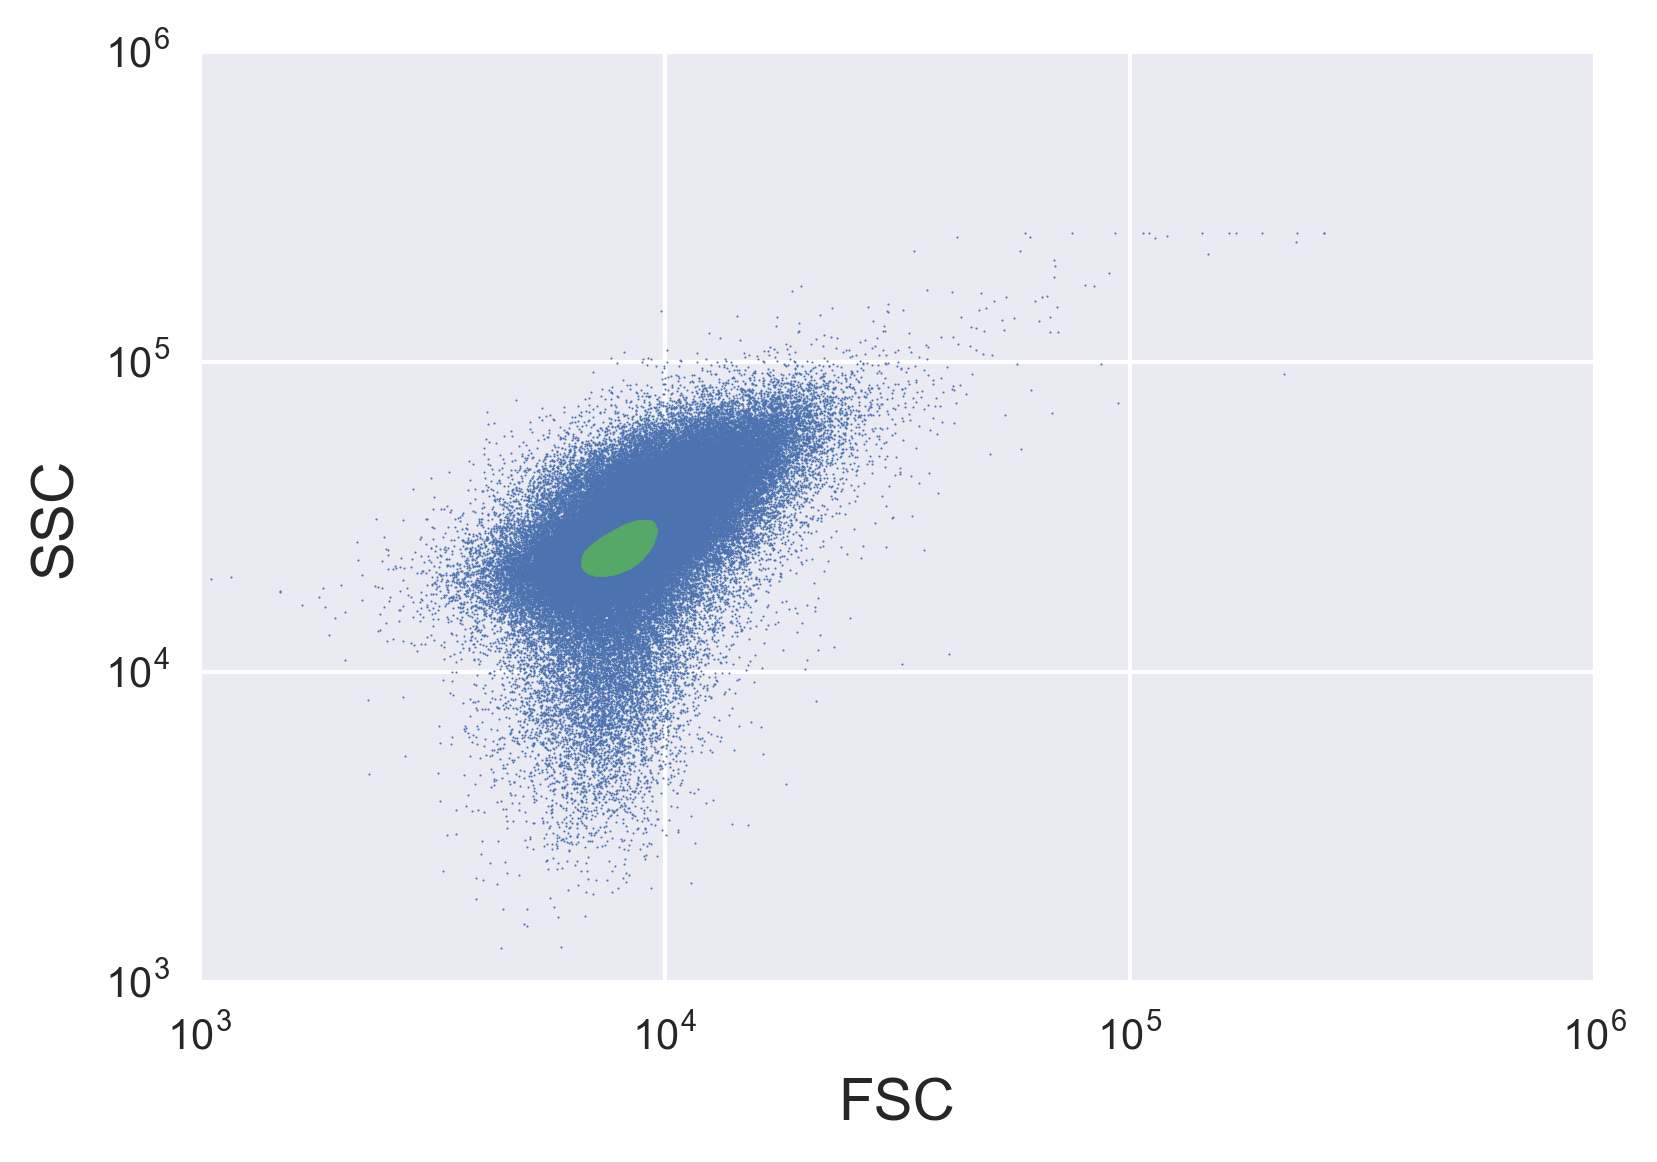

In [2]:
# Load the DataFrame
df = pd.read_csv('../data/flow_data/20160807_0_RBS1027_10.0.csv')

# Plot the excluded data (rasterized important kwarg for large datasets)
plt.loglog(df.loc[df['gate']==0, 'FSC-A'], df.loc[df['gate']==0, 'SSC-A'], 
           marker='.', linestyle='none', markersize=1, rasterized=True)

# Plot gated data points
plt.loglog(df.loc[df['gate']==1, 'FSC-A'], df.loc[df['gate']==1, 'SSC-A'], 
           marker='.', linestyle='none', markersize=1, rasterized=True)

# Label axes
plt.xlabel('FSC')
plt.ylabel('SSC');

The points in green were considered good measurements, as they were in the highest density region. The blue points were ignored.

After that long introduction, it is now time for you to chew on these data. You can download the data set [here](https://www.dropbox.com/s/iwcop7ibbgy5uxd/flow_data.zip?dl=0). Be sure to read the `README.md` file in there. These data were acquired by our very own Manuel Razo and Griffin Chure. 

Throughout the analysis, you will have to make some decisions about how to treat various features and anomalies you may encounter in the data. Give principled arguments about the choices you make in your analysis. It may also be useful to note that the following appeared in Manuel's lab notes on August 4, 2016: "The 250uM concentration was excluded from the analysis since we confused the tube and put the wrong concentration." *(I am not making this up just to get you to learn how to think about outliers. This is actually what was written in Manuel's lab notes.)*

**a)** *(20 pts extra credit)* Devise and implement an automated gating procedure. Apply it to the data set. If you succeed in this task, use your own gated data in the subsequent analyses. Otherwise, you can use the gating results I have included in the data set.

**b)** For each CSV file in the data set, compute the mean YFP fluorescence for the gated samples. It will probably help you to store these values in a `DataFrame` that has the date, run number, IPTG concentration, strain, and YFP fluorescence as columns. *Hint*: For parsing multiple files, the `glob.glob()` function of the `glob` module might be useful. You will also need to parse the file names of the CSV files. I found Python's `split` method for strings to be useful.

**c)** Compute the fold change for each date/run/IPTG concentration combination. In other words, this is the fold change for each trial at each IPTG concentration.

**d)** Perform a regression on the fold change vs. IPTG concentration data to get estimates for $K_\mathrm{A}$ and $K_\mathrm{I}$. You may assume the other parameters are fixed at the values listed in the above table. Be sure to report your results graphically and with numerical summaries.

**e)** *(20 points extra credit)* The estimates I gave for the "pre-determined parameters," $R$, $K_\mathrm{RD}$, and $K_\mathrm{AI}$, are not known exactly. Unfortunately, we do not really know the error bars on these estimates. Nonetheless, we can still deal with the uncertainty. Devise informative priors for these parameters and incorporate them into your parameter estimation. How does this change the estimates you got of $K_\mathrm{A}$ and $K_\mathrm{I}$? 